## Heart Disease Prediction

In [5]:
#Importing Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#Read Dataset
df = pd.read_csv('heart (1).csv')

In [7]:
#Overview of Data
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [8]:
#Summary Statistics of Data
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Data Cleaning

In [9]:
#Checking for null data

df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
#Checking for duplicate data
df.duplicated().sum()

0

In [11]:
#Replacing some text values with numberical

#Replacing Male and Not-Male(Female) as 1 and 0 respectively in Sex Column
df = df.replace({'Sex' : {'M' : 1, 'F': 0}})

In [12]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

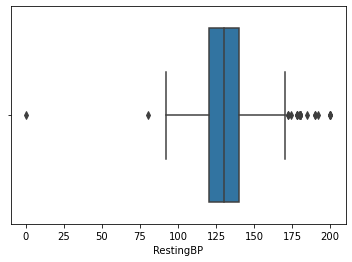

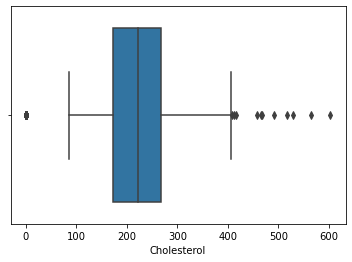

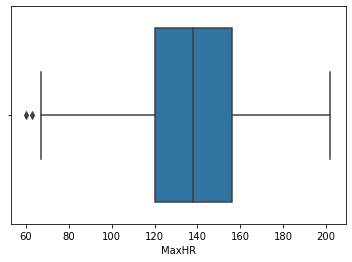

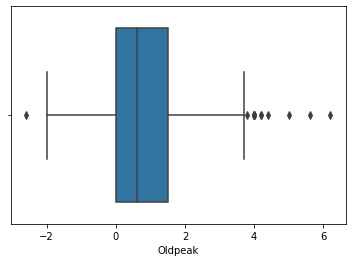

In [13]:
#Checking for outliers using Boxplots
count = 1

columns_text = ['Age','Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope', 'HeartDisease', 'FastingBS']

for column in df.drop(columns_text, axis = 1):
    fig = plt.figure(figsize = (6,4))
    sns.boxplot(x = df[column], hue = df.HeartDisease)
    if count == 1: 
        count += 1
    else:
        count == 1

We see some outliers, we need to remove them. We will use the IQR (Inter Quartile Range)

IQR = Q3 - Q1

In [14]:
#We will use Quantile based flooring and capping with 10% percentile as flooring and 90% percentile as capping

outlier_columns = ['RestingBP','Oldpeak', 'MaxHR', 'Cholesterol']

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
tenth_percentile = df.quantile(0.1)
ninety_percentile = df.quantile(0.9)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [15]:
(df == 0).sum(axis = 0)

Age                 0
Sex               193
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS         704
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak           368
ST_Slope            0
HeartDisease      410
dtype: int64

In [16]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,1,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,1,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,0,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [17]:
# We will delete all the data with outliers because replacing them will result in inaccurate calculations, 
#and we can't take that risk in health scenario

for x in outlier_columns:
    df = df[(df[x] > lower_bound[x]) & (df[x] < upper_bound[x])]

In [18]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,1,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,1,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,0,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             690 non-null    int64  
 1   Sex             690 non-null    int64  
 2   ChestPainType   690 non-null    object 
 3   RestingBP       690 non-null    int64  
 4   Cholesterol     690 non-null    int64  
 5   FastingBS       690 non-null    int64  
 6   RestingECG      690 non-null    object 
 7   MaxHR           690 non-null    int64  
 8   ExerciseAngina  690 non-null    object 
 9   Oldpeak         690 non-null    float64
 10  ST_Slope        690 non-null    object 
 11  HeartDisease    690 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 70.1+ KB


In [20]:
#Replacing Categorical columns

# Select categorical variables
categ = df.select_dtypes(include=object).columns

# One hot encoding
df = pd.get_dummies(df, columns=categ, drop_first=True)  
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0.0,0,1,0,0,1,0,0,0,1
1,49,0,160,180,0,156,1.0,1,0,1,0,1,0,0,1,0
2,37,1,130,283,0,98,0.0,0,1,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1.5,1,0,0,0,1,0,1,1,0
4,54,1,150,195,0,122,0.0,0,0,1,0,1,0,0,0,1


In [21]:
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0.0,0,1,0,0,1,0,0,0,1
1,49,0,160,180,0,156,1.0,1,0,1,0,1,0,0,1,0
2,37,1,130,283,0,98,0.0,0,1,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1.5,1,0,0,0,1,0,1,1,0
4,54,1,150,195,0,122,0.0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,1.2,1,0,0,1,1,0,0,1,0
914,68,1,144,193,1,141,3.4,1,0,0,0,1,0,0,1,0
915,57,1,130,131,0,115,1.2,1,0,0,0,1,0,1,1,0
916,57,0,130,236,0,174,0.0,1,1,0,0,0,0,0,1,0


In [22]:
#df.to_csv('heart-3.csv')

## Machine Learning

In [23]:
# Splitting Data into Training and Test Dataset

from sklearn.model_selection import train_test_split
y = df['HeartDisease']
X = df.drop(columns = 'HeartDisease')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))

Accuracy score:  0.8744
F1 Score:  0.8687


### K-Nearest Neighbour

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# First model
knn = KNeighborsClassifier(n_neighbors=1)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))

Accuracy score:  0.657
F1 Score:  0.6537


### SVM

In [26]:
from sklearn.svm import SVC

# First model
svm=SVC(random_state=1)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))

Accuracy score:  0.686
F1 Score:  0.6286


### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))

Accuracy score:  0.7681
F1 Score:  0.75


### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

# First model
RF = RandomForestClassifier(random_state=42, n_estimators=100)
                            
RF = RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))

Accuracy score:  0.9034
F1 Score:  0.902


Next Steps - 

Gradient Boosting and ADABoost to be tried next

Improve the accuracy by finding out various improvement parameters and plugging them in